# CS 373 Project
By Tianyu Chen(chen2216@purdue.edu), Hei Jing Tsang(tsangh@purdue.edu), Shikang Fan(fan165@purdue.edu), Ruoyu Song( song464@purdue.edu)

## 1 Load data

In [1]:
import pandas as pd
import datetime

def gen_clean_data():
    df = pd.read_csv("Melbourne_housing_FULL.csv")
    df = df[['Price', 'Distance', 'Car', 'BuildingArea', 'YearBuilt']]
    clean_df = df.dropna(how='any', axis=0)
    clean_df.to_csv("clean_data.csv", sep='\t')
    return clean_df

gen_clean_data().head(10)


,Price,Distance,Car,BuildingArea,YearBuilt
2,1035000.0,2.5,0.0,79.0,1900.0
4,1465000.0,2.5,0.0,150.0,1900.0
6,1600000.0,2.5,2.0,142.0,2014.0
11,1876000.0,2.5,0.0,210.0,1910.0
14,1636000.0,2.5,2.0,107.0,1890.0
18,1097000.0,2.5,2.0,75.0,1900.0
24,1350000.0,2.5,2.0,190.0,2005.0
25,750000.0,2.5,1.0,94.0,2009.0
30,1310000.0,2.5,2.0,97.0,1890.0
32,1200000.0,2.5,1.0,110.0,1880.0


## 2 Data interpretation
To predict to house price for the city of Melbourne, we select 4 features out of original 13 features. In Part 1.1, we also filter out the data entries that are missing values. In the process of filtering, we dropped the features that clearly has no influence over the market price, like seller's name, and those that we consider to have very minimal impact like the rooms layout, number of bedrooms and bathrooms.

Eventually, we select 5 features that we believe could be used to predict the relatively accurate price. The features are, 
    1. Distance to downtown CBD(Distance)
    2. Number of parking lots(Car)
    3. Building area(BuildingArea)
    4. The year that the house was built(YearBuilt).

## 3. Analyze the data

We are planning to perform linear regression to predict the price, therefore we would like to plot each feature versus the actual price to show why linear regression is useful in this case

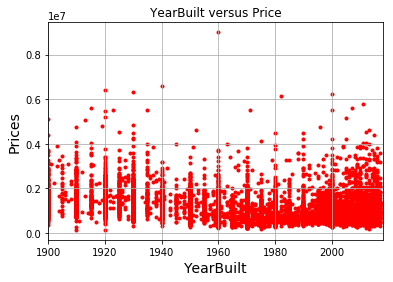

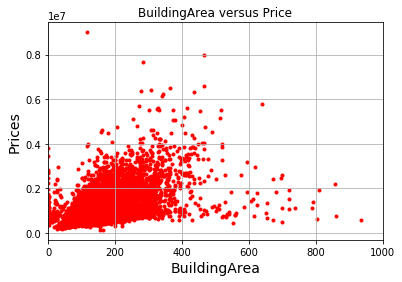

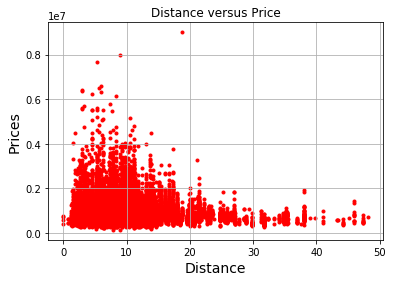

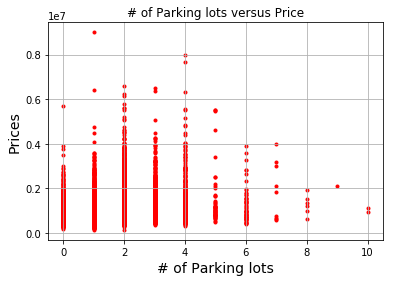

In [13]:
import matplotlib.pyplot as plt
import matplotlib.markers as mk
import pandas as pd
import numpy as np
# Read data
df = pd.read_csv("clean_data.csv", sep='\t')

# Plot yearbuilt versus price
plt.scatter(df['YearBuilt'], df['Price'], color='red', marker='.')
plt.title('YearBuilt versus Price')
# Don't show the outliers
plt.xlim((1900, 2018))
plt.xlabel('YearBuilt', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot buildingarea versus price
plt.scatter(df['BuildingArea'], df['Price'], color='red', marker='.')
plt.title('BuildingArea versus Price')
# Zoom in
plt.xlim((0, 1000))
plt.xlabel('BuildingArea', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot distance versus price
plt.scatter(df['Distance'], df['Price'], color='red', marker='.')
plt.title('Distance versus Price')
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot Car(Parking lots) versus price
plt.scatter(df['Car'], df['Price'], color='red', marker='.')
plt.title('# of Parking lots versus Price')
plt.xlabel('# of Parking lots', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()


Graph 1: As we can see for the YearBuild graph, there seems to be a ascending trend of price from 1960 to 2018. This is understandable because houses before 1960 have probably undergone some form of renovation, so even though the house is built relative long ago, the price could still be high due to the cost of renovation. And there's also lots of outliers because of the fact that the price does not solely depend on the year built but other factors.

Graph 2: On the graph, we can clearly show the linear like trend on price regarding to building area which we can apply linear regression on. The wide diversity of opening indicates building area isn't the sole factor that affects the price.

Graph 3: Like area versus building graph, we can see downward sloping trend of the price versus distance to CBD. This is expected, because of the commonsense that the farther the house is to CBD the lower the price is.

Graph 4: We consider number of parking lots to add some value to the property as you can see on the x = 0 to x = 4. The prices of the properties increase as the number of parking lots goes up. But it seems that when the number of parking lots exceeds 5, the price becomes lower. A possible explanation would be houses that have more than 5 parking lots are usually located in the suburban which is why there are ample spaces for parking. And houses in suburban areas are usually cheaper. But still, we still believe that the number of parking lot would add marginal value to the value of the property.

## 4.1 Training on the whole dataset

In [3]:
def get_data_points():
    df = pd.read_csv("clean_data.csv", sep='\t')
    df = df.dropna(how='any', axis=0)
    x_points = df[['Distance', 'Car','BuildingArea', 'YearBuilt']]
    y_points = df[['Price']]
    return np.array(x_points), np.array(y_points)

get_data_points()

(array([[2.500e+00, 0.000e+00, 7.900e+01, 1.900e+03],
        [2.500e+00, 0.000e+00, 1.500e+02, 1.900e+03],
        [2.500e+00, 2.000e+00, 1.420e+02, 2.014e+03],
        ...,
        [6.300e+00, 1.000e+00, 1.040e+02, 2.018e+03],
        [6.300e+00, 2.000e+00, 1.200e+02, 2.000e+03],
        [6.300e+00, 0.000e+00, 1.030e+02, 1.930e+03]]), array([[1035000.],
        [1465000.],
        [1600000.],
        ...,
        [ 888000.],
        [ 705000.],
        [1020000.]]))

## 4.2 Training with ridge linear regression

In this section we will perform ridge linear regression and lasso linear regression without cross validation just to see the best scenario that is, the maximum accuracy we can possibly achieve. We will perform cross validation in the next section

In [4]:
from sklearn.linear_model import Ridge

# Obtain training data
x, y = get_data_points()
x_train = x
y_train = y

ridge = Ridge(alpha=1)
ridge_mod = ridge.fit(x_train, y_train) 

ridge_pred = ridge_mod.predict(x)
print(np.sqrt(np.mean((ridge_pred - y) ** 2)))
print(np.mean((ridge_pred - y) ** 2))

505435.546659076
255465091826.559


## 4.3 Training with lasso regression

In [5]:
from sklearn.linear_model import Lasso

x, y = get_data_points()
x_train = x
y_train = y

lasso = Lasso(alpha=1)
lasso_mod = lasso.fit(x_train, y_train) 

lasso_pred = lasso_mod.predict(x)
print(np.sqrt(np.mean((lasso_pred - y) ** 2)))
print(np.mean((lasso_pred - y) ** 2))

817379.118819733
668108623882.5232


## 4.4 Conclusion

Here we can see, for ridge regression, when alpha is 1, the best percision we can possibly achieve is standard mean square error = 505435.55, MSE = 255465091826.559, and for lasso regression when the alpha is 1 , the best percision we can achieve is standard mean square error =817379.12, MSE = 668108623882.5232. And in the following sections, we will try to figure the best value of alpha for each regression method along with cross-validation to minimize the error. 

## 5.1 Ten-fold cross validation ridge regression

Here we are still using alpha = 1 just to validate our training method, we will be using hyperparameter tuning with nested cross validation in the next section.

In [9]:
from sklearn.linear_model import Ridge

def ridge_regression(x_train, y_train, x, y):
    # Training
    ridge = Ridge(alpha=1)
    ridge_mod = ridge.fit(x_train, y_train) 
    # Predicting
    ridge_pred = ridge_mod.predict(x)
    # Calculate standard MSE
    return np.sqrt(np.mean((ridge_pred - y) ** 2))
    
# Function for performing K-fold cross validation
def k_fold(k,X,y):
    (n, d) = np.shape(X)
    z = np.zeros((k, 1))
    for i in range(0,k):
        T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
        S = set(range(0, n)) - T

        z[i] = ridge_regression(X[list(S)], y[list(S)], X[list(T)], y[list(T)])
    return z

x, y = get_data_points()
k_fold(10, x, y)

array([[659761.14515044],
       [514601.47720797],
       [416697.17407303],
       [497483.79730523],
       [497016.50636339],
       [416242.73026391],
       [540499.46954611],
       [519009.54905123],
       [507483.16660474],
       [490652.39845253]])

As you can see, the standard MSE are actually quite close to our result in the previous section which is a good sign.

## 5.2 Ten-fold cross validation ridge regression

In [12]:
from sklearn.linear_model import Lasso

def ridge_regression(x_train, y_train, x, y):
    # Training
    lasso = Lasso(alpha=1)
    lasso_mod = lasso.fit(x_train, y_train) 
    # Predicting
    lasso_pred = lasso_mod.predict(x)
    # Calculate standard MSE
    return np.sqrt(np.mean((lasso_pred - y) ** 2))
    
# Function for performing K-fold cross validation
def k_fold(k,X,y):
    (n, d) = np.shape(X)
    z = np.zeros((k, 1))
    for i in range(0,k):
        T = set(range(int(np.floor((n*i)/k)), int(np.floor(((n*(i+1))/k)-1))+1))
        S = set(range(0, n)) - T

        z[i] = ridge_regression(X[list(S)], y[list(S)], X[list(T)], y[list(T)])
    return z

x, y = get_data_points()
k_fold(10, x, y)

array([[986877.99348201],
       [853083.3447974 ],
       [707651.96463945],
       [789763.6934287 ],
       [804599.16807971],
       [687321.74335478],
       [802067.59355243],
       [843858.10342356],
       [854860.29259829],
       [794961.77844788]])

As you can see, the standard MSE are actually quite close to our result in the previous section which is a good sign.